In [86]:
import matplotlib.pyplot as plt
from lib.DataWriter import DataWriter
inter_type = {
    0: 'Fourway',
    1: 'Traffic lights',
    2: 'Equivalent',
    4: 'Smart_lights'
}

In [37]:
def get_parameters(p_spawn=0.1, max_speed_horizontal=3, max_speed_vertical=3, intersection_type = 'Fourway'):
    t_traffic_light_cycle=5
    p_bend = 0.33
    p_u_turn = 0.01
    p_left = p_bend
    p_right = p_bend
    p_straight = p_bend
    t_from_north = t_traffic_light_cycle
    t_from_west = t_traffic_light_cycle
    t_from_east = t_traffic_light_cycle
    t_from_south = t_traffic_light_cycle


    parameters = {
        "max_speed_horizontal": max_speed_horizontal,
        "max_speed_vertical": max_speed_vertical,
        "alpha_factor": 5,
        "beta_factor": 2,
        "intersection_type": intersection_type,
        "t_from_north": t_from_north,
        "t_from_west": t_from_west,
        "t_from_east": t_from_east,
        "t_from_south": t_from_south,
        "p_car_spawn_north": p_spawn,
        "p_north_to_north": p_u_turn,
        "p_north_to_west": p_right,
        "p_north_to_east": p_left,
        "p_north_to_south": p_straight,
        "p_car_spawn_west": p_spawn,
        "p_west_to_north": p_left,
        "p_west_to_west": p_u_turn,
        "p_west_to_east": p_straight,
        "p_west_to_south": p_right,
        "p_car_spawn_east": p_spawn,
        "p_east_to_north": p_right,
        "p_east_to_west": p_straight,
        "p_east_to_east": p_u_turn,
        "p_east_to_south": p_left,
        "p_car_spawn_south": p_spawn,
        "p_south_to_north": p_straight,
        "p_south_to_west": p_left,
        "p_south_to_east": p_right,
        "p_south_to_south": p_u_turn,
    }
    return parameters


In [38]:
import random 
fourway = []
traffic_lights = []
equivalent = []
smart_lights = []

for run_id in range(1,3000):
    datawriter = DataWriter()
    data = datawriter.read_database(run_id)
    
    #print(run_id)
    #print(data['results']['mean_crossover_time'])
    if data['parameters']['intersection_type'] == 'Fourway':
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        crossover = data['results']['mean_crossover_time'][-1]
        if throughput != 0:
            fourway.append([throughput,p_spawn,av_speed,crossover])
    elif data['parameters']['intersection_type'] == 'Traffic lights':
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        crossover = data['results']['mean_crossover_time'][-1]
        if throughput != 0:
            traffic_lights.append([throughput,p_spawn,av_speed,crossover])
    elif data['parameters']['intersection_type'] == 'Equivalent':
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        crossover = data['results']['mean_crossover_time'][-1]
        if throughput != 0:
            equivalent.append([throughput,p_spawn,av_speed,crossover])
    else:
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        crossover = data['results']['mean_crossover_time'][-1]
        if throughput != 0:
            smart_lights.append([throughput,p_spawn,av_speed,crossover])
    
    

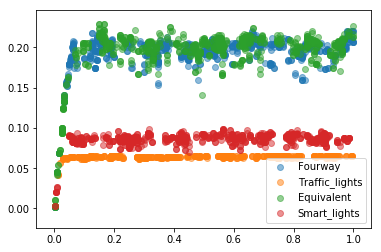

In [39]:
# set some parameters :


cross_dict = {'Fourway':fourway, 'Traffic_lights':traffic_lights, 'Equivalent':equivalent,'Smart_lights': smart_lights}
#print(cross_dict)
for key in cross_dict.keys():
    through = [x[0] for x in cross_dict[key]]
    p = [z[1] for z in cross_dict[key]]
    plt.scatter(p,through, alpha = .5, label = key)
        
plt.legend()
plt.show()

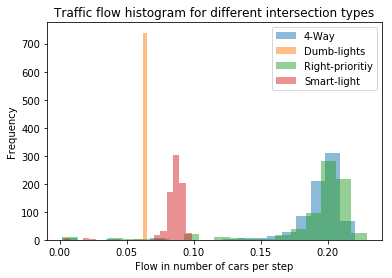

In [121]:
flows = []

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

count = 0
names = ['4-Way','Dumb-lights', 'Right-prioritiy', 'Smart-light']

for key in cross_dict.keys():
    through = [x[0] for x in cross_dict[key]]
    flows.append(through)
    plt.hist(through, bins = 20, alpha = .5, label = names[count])
    plt.title('Traffic flow histogram for different intersection types')
    plt.ylabel('Frequency')
    plt.xlabel('Flow in number of cars per step')
    plt.legend()
    count += 1


In [96]:
from scipy.stats import kruskal
from scikit_posthocs import posthoc_nemenyi as nem
import numpy as np
# perform kruskal-wallis non-parametric ANOVA
keys = cross_dict.keys()
    
statistic, p_value = kruskal(flows[0],flows[1],flows[2],flows[3])
print('statistic and p-value for kruskal test : ',statistic,p_value)
print(p_value)

# PostHoc
data = [flows[0],flows[1],flows[2],flows[3]]
result = nem(data)
print(result)
for line in range(4):
    for point in range(4):
        if result[line][point] < 0:
            result[line][point] = np.nan
        elif result[line][point] < 0.001:
            result[line][point]= .0009
        elif result[line][point] < 0.01:
            result[line][point]= .009
        elif result[line][point] < 0.05:
            result[line][point]= .04


statistic and p-value for kruskal test :  2322.334367642276 0.0
0.0
[[-1.00000000e+000  0.00000000e+000  1.12024258e-001  1.83212411e-107]
 [ 0.00000000e+000 -1.00000000e+000  0.00000000e+000  7.08271301e-061]
 [ 1.12024258e-001  0.00000000e+000 -1.00000000e+000  1.63415699e-132]
 [ 1.83212411e-107  7.08271301e-061  1.63415699e-132 -1.00000000e+000]]


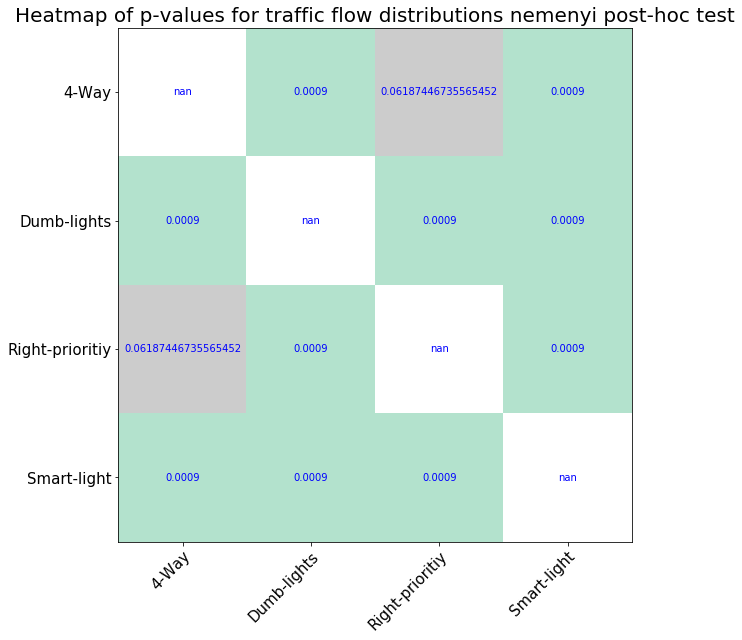

In [124]:
fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(result,cmap = 'Pastel2')

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

# We want to show all ticks...
ax.set_xticks(np.arange(len(keys)))
ax.set_yticks(np.arange(len(keys)))
# ... and label them with the respective list entries
ax.set_xticklabels(names)
ax.set_yticklabels(names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(keys)):
    for j in range(len(keys)):
        text = ax.text(j, i, result[i, j],
                       ha="center", va="center", color="b")

ax.set_title("Heatmap of p-values for traffic flow distributions nemenyi post-hoc test",fontsize=20)
fig.tight_layout()
plt.show()

745
754
745
755


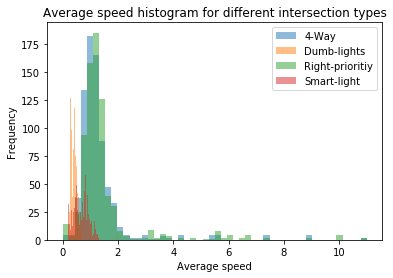

In [122]:
av_speeds = []

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

count = 0

for key in cross_dict.keys():
    av_speed = [x[2] for x in cross_dict[key]]
    print(len(av_speed))
    av_speeds.append(av_speed)
    plt.hist(av_speed, bins = 50, alpha = .5, label = names[count])
    plt.title('Average speed histogram for different intersection types')
    plt.ylabel('Frequency')
    plt.xlabel('Average speed')
    plt.legend()
    count += 1
    

In [116]:
statistic, p_value = kruskal(av_speeds[0],av_speeds[1],av_speeds[2],av_speeds[3])
print('statistic and p-value for kruskal test : ',statistic,p_value)
print(p_value)

# PostHoc
data = [av_speeds[0],av_speeds[1],av_speeds[2],av_speeds[3]]
result = nem(data)
print(result)
for line in range(4):
    for point in range(4):
        if result[line][point] < 0:
            result[line][point] = np.nan
        elif result[line][point] < 0.001:
            result[line][point]= .0009
        elif result[line][point] < 0.01:
            result[line][point]= .009
        elif result[line][point] < 0.05:
            result[line][point]= .04


statistic and p-value for kruskal test :  1760.0614362636775 0.0
0.0
[[-1.00000000e+000  9.44015394e-247  4.07187753e-001  4.73801444e-095]
 [ 9.44015394e-247 -1.00000000e+000  2.08188616e-272  1.83944532e-035]
 [ 4.07187753e-001  2.08188616e-272 -1.00000000e+000  3.22105819e-111]
 [ 4.73801444e-095  1.83944532e-035  3.22105819e-111 -1.00000000e+000]]


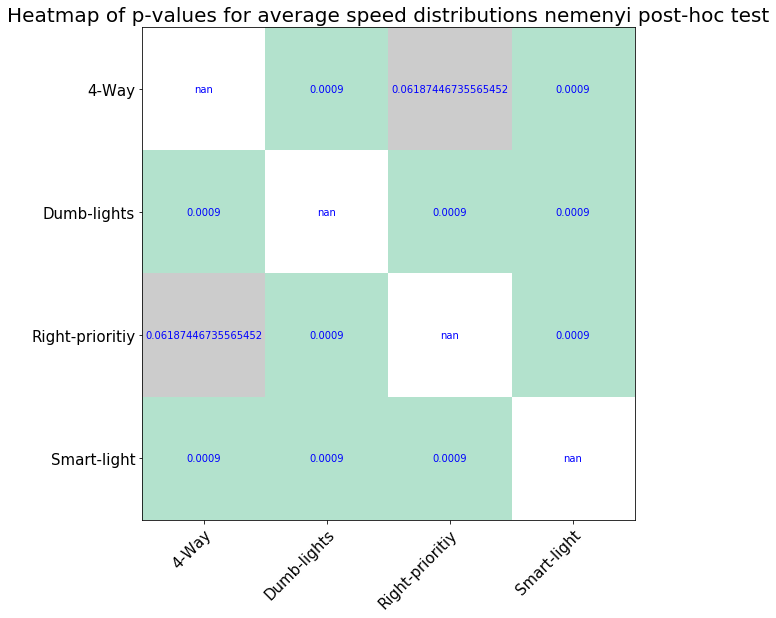

In [125]:
fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(result,cmap = 'Pastel2')

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

# We want to show all ticks...
ax.set_xticks(np.arange(len(keys)))
ax.set_yticks(np.arange(len(keys)))
# ... and label them with the respective list entries
ax.set_xticklabels(names)
ax.set_yticklabels(names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(keys)):
    for j in range(len(keys)):
        text = ax.text(j, i, result[i, j],
                       ha="center", va="center", color="b")

ax.set_title("Heatmap of p-values for average speed distributions nemenyi post-hoc test",fontsize=20)
fig.tight_layout()
plt.show()

745
754
745
755


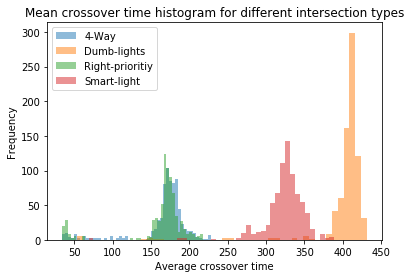

In [126]:
cross_times = []

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

count = 0

for key in cross_dict.keys():
    crossover = [x[3] for x in cross_dict[key]]
    print(len(crossover))
    cross_times.append(crossover)
    plt.hist(crossover, bins = 50 ,alpha = .5, label = names[count])
    plt.title('Mean crossover time histogram for different intersection types')
    plt.ylabel('Frequency')
    plt.xlabel('Average crossover time')
    plt.legend()
    count += 1

In [118]:
statistic, p_value = kruskal(cross_times[0],cross_times[1],cross_times[2],cross_times[3])
print('statistic and p-value for kruskal test : ',statistic,p_value)
print(p_value)

# PostHoc
data = [cross_times[0],cross_times[1],cross_times[2],cross_times[3]]
result = nem(data)
print(result)
for line in range(4):
    for point in range(4):
        if result[line][point] < 0:
            result[line][point] = np.nan
        elif result[line][point] < 0.001:
            result[line][point]= .0009
        elif result[line][point] < 0.01:
            result[line][point]= .009
        elif result[line][point] < 0.05:
            result[line][point]= .04


statistic and p-value for kruskal test :  2425.398454685837 0.0
0.0
[[-1.00000000e+000  0.00000000e+000  6.18744674e-002  6.18475713e-123]
 [ 0.00000000e+000 -1.00000000e+000  0.00000000e+000  1.67796526e-052]
 [ 6.18744674e-002  0.00000000e+000 -1.00000000e+000  1.21895507e-152]
 [ 6.18475713e-123  1.67796526e-052  1.21895507e-152 -1.00000000e+000]]


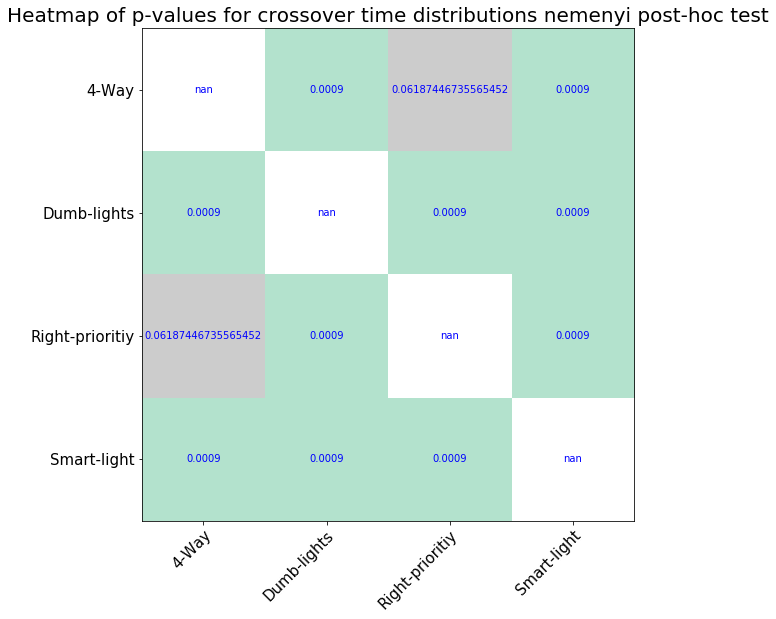

In [128]:
fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(result,cmap = 'Pastel2')

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

# We want to show all ticks...
ax.set_xticks(np.arange(len(keys)))
ax.set_yticks(np.arange(len(keys)))
# ... and label them with the respective list entries
ax.set_xticklabels(names)
ax.set_yticklabels(names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(keys)):
    for j in range(len(keys)):
        text = ax.text(j, i, result[i, j],
                       ha="center", va="center", color="b")

ax.set_title("Heatmap of p-values for crossover time distributions nemenyi post-hoc test",fontsize=20)
fig.tight_layout()
plt.show()